In [0]:
import pandas as pd
import matplotlib.pyplot as plt  #used to plot the graph
from matplotlib import style
style.use("ggplot")

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 10,8
import cufflinks as cf  #it binds pandas and plotly together
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode,plot,iplot    #this is used to use plotly offline

import folium    # used to display maps and plot on the maps



In [0]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [0]:
from google.colab import  files
uploaded = files.upload()

Saving indigo codingf.txt to indigo codingf.txt


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Covid cases in India.xlsx']))

KeyError: ignored

In [0]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [0]:
df.drop(['S. No.'], axis=1, inplace= True)

In [0]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [0]:
df['Total cases']=df['Total Confirmed cases ( Foreign National )' ]+df['Total Confirmed cases (Indian National)']

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [0]:
 total_cases_overall = df['Total cases'].sum()
 print("total cases overall in India: ",total_cases_overall)

total cases overall in India:  729


In [0]:
df['Active cases']= df['Total cases']-df['Death']-df['Cured']

In [0]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [0]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [0]:
total_active_cases = df.groupby('Name of State / UT')['Active cases'].sum().sort_values(ascending = False).to_frame()  #used to sort the values in ascending order

In [0]:
total_active_cases

,Active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [0]:
total_active_cases.style.background_gradient(cmap="Reds")

,Active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [0]:
 ################## graphs

In [0]:
#panda visual

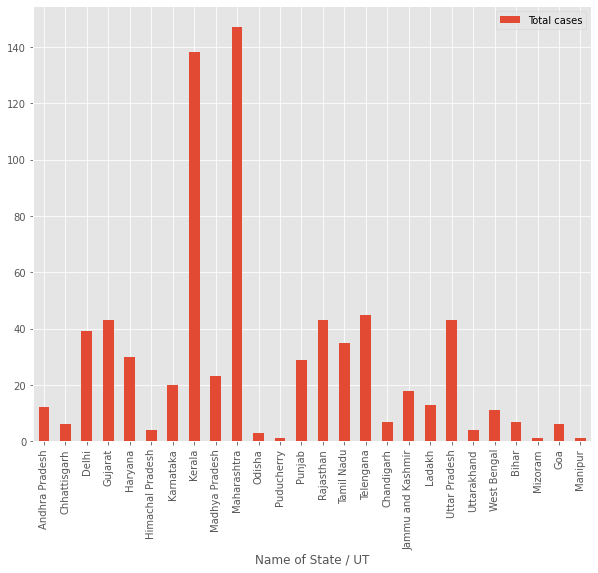

In [0]:
df.plot(kind='bar', x = 'Name of State / UT', y = 'Total cases')

In [0]:
#matplotlib vls

<BarContainer object of 26 artists>

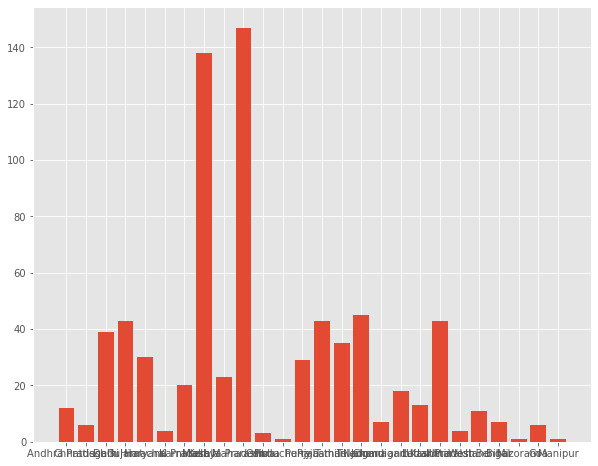

In [0]:
plt.bar(df['Name of State / UT'],df['Total cases'])

In [0]:
df.iplot(kind='bar', x='Name of State / UT',y ='Total cases')